## Homework 5
Justin Lau 
07/26/20

## Imports

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from pandas import DataFrame
from scipy.stats import linregress

## Question 1

In [37]:
#Data from Question 5 to prove (1)
f = [6.000000000000000,
     10.242640687119284,
     2.000000000000000,
     -2.585786437626905,
    2.000000000000000,
    1.757359312880716,
    -6.000000000000000,
    -5.414213562373098]

c = []
for i in range(8):
    a = [f[k]*(np.cos(2*math.pi*i*k/len(f))-np.sin(2*math.pi*i*k/len(f))*1j) for k in range(8)]
    c.append(sum(a))
data = {'ck':c,'FFT':fft.fft(f)}
DataFrame(data)

,ck,FFT
0,8.000000e+00+0.000000e+00j,8.000000e+00-0.000000e+00j
1,8.000000e+00-1.600000e+01j,8.000000e+00-1.600000e+01j
2,1.200000e+01-2.000000e+01j,1.200000e+01-2.000000e+01j
3,-2.220446e-15-1.332268e-15j,3.552714e-15+0.000000e+00j
4,2.664535e-15+3.217658e-16j,3.552714e-15-0.000000e+00j
5,1.332268e-14+3.108624e-15j,3.552714e-15-0.000000e+00j
6,1.200000e+01+2.000000e+01j,1.200000e+01+2.000000e+01j
7,8.000000e+00+1.600000e+01j,8.000000e+00+1.600000e+01j


Using Scipy FFT package we can see that using the data from Question 5 that the Fourier coefficient from the package is (1)

## Question 2

Using the same guide online for scipy library it indicates that (5) is the expression for inverse DFT

In [26]:
data = {'Inverse':fft.ifft(fft.fft(f))}
DataFrame(data)

,Inverse
0,6.000000+0.000000j
1,10.242641+0.000000j
2,2.000000+0.000000j
3,-2.585786+0.000000j
4,2.000000+0.000000j
5,1.757359+0.000000j
6,-6.000000-0.000000j
7,-5.414214+0.000000j


## Question 3 is on the pdf

## Question 4

In [27]:
#Finding ak, bk Fourier coefficients 
def fourier(f):
    C = fft.fft(f)
    A = [] 
    B = []
    for x in C:
        A.append(2*x.real/len(f))
        B.append(-2*x.imag/len(f))
    return [A,B]

#Interpolating trigonometric polynomial
def trig_interpolating(f,x):
    N = int(len(f)/2)
    A = fourier(f)[0][:N+1]
    B = fourier(f)[1][:N+1]
    y = []
    for z in x:
        l = [A[k]*np.cos(k*z)+B[k]*np.sin(k*z) for k in range(1,len(A)-1)]
        y.append(A[0]/2+sum(l)+A[-1]/2*np.cos(N*z))
    return y

## Question 5

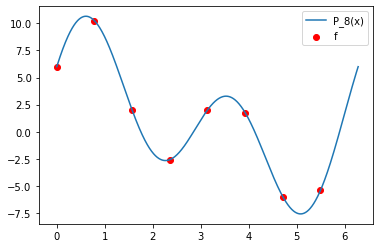

In [28]:
t = np.linspace(0,2*math.pi,1000)
points = np.linspace(0,2*math.pi,9)
plt.plot(t,trig_interpolating(f,t),label='P_8(x)')
plt.scatter(points[:8],f,color='red',label='f')
plt.legend()
plt.show()


## Problem 6

In [29]:
N = 8
xj = np.linspace(0,2*math.pi,N+1)[:N]
x = np.linspace(0,2*math.pi,100)

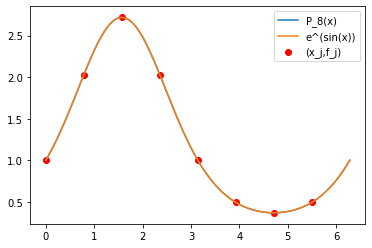

In [30]:
plt.scatter(xj,np.exp(np.sin(xj)), color = 'red',label = '(x_j,f_j)')
plt.plot(x,trig_interpolating(np.exp(np.sin(xj)),x),label = 'P_8(x)')
plt.plot(x,np.exp(np.sin(x)),label ='e^(sin(x))')
plt.legend()
plt.show()

In [31]:
#Derivative of P Fourier Coefficient
def diff_fourier(f):
    C = fft.fft(f)
    A = []
    B = []
    k = 0
    for x in C:
        A.append(-2*k*x.imag/len(f))
        B.append(-2*k*x.real/len(f))
        k = k+1
    return [A,B]

#Derivative of trigonometric interpolating polynomial
def diff_trig_interpolating(f,x):
    N = int(len(f)/2) 
    A = diff_fourier(f)[0][:N+1]
    B = diff_fourier(f)[1][:N+1]
    y = []
    for z in x:
        l = [A[k]*np.cos(k*z)+B[k]*np.sin(k*z) for k in range(1,len(A)-1)]
        y.append(A[0]/2+sum(l)+A[-1]/2*np.cos(N*z))
    return y

In [32]:
dat = {"P8'(xj)":diff_trig_interpolating(np.exp(np.sin(xj)),xj), 
       "f'(xj)":np.cos(xj)*np.exp(np.sin(xj)),
       "Error":abs(diff_trig_interpolating(np.exp(np.sin(xj)),xj)-np.cos(xj)*np.exp(np.sin(xj)))}
DataFrame(dat)

,P8'(xj),f'(xj),Error
0,9.956821e-01,1.000000e+00,4.317911e-03
1,1.437543e+00,1.434094e+00,3.449100e-03
2,4.935202e-16,1.664468e-16,3.270734e-16
3,-1.437543e+00,-1.434094e+00,3.449100e-03
4,-9.956821e-01,-1.000000e+00,4.317911e-03
5,-3.513817e-01,-3.486522e-01,2.729471e-03
6,2.871168e-17,-6.757836e-17,9.629004e-17
7,3.513817e-01,3.486522e-01,2.729471e-03


## Question 7 Part A

In [33]:
#Spectral Approximation
def diff_f(f):
    N = int(len(f)/2)
    c = fft.fft(f)
    for k in range(N):
        c[k] = 1j*k*c[k] 
    for k in range(N+1,len(c)):
        c[k] = 1j*(k-len(f))*c[k] 
    c[N] = 0 
    return fft.ifft(c).real 

## Part B

In [34]:
#Comparing the errors
data = {"P8'(xj) (P7)":diff_f(np.exp(np.sin(xj))),
        "P8'(xj) (P6)":diff_trig_interpolating(np.exp(np.sin(xj)),xj), 
        "f'(xj)":np.cos(xj)*np.exp(np.sin(xj)),
        "Error (P7)":abs(diff_f(np.exp(np.sin(xj)))-np.cos(xj)*np.exp(np.sin(xj))),
        "Error (P6)":abs(diff_trig_interpolating(np.exp(np.sin(xj)),xj)-np.cos(xj)*np.exp(np.sin(xj)))}
DataFrame(data)

,P8'(xj) (P7),P8'(xj) (P6),f'(xj),Error (P7),Error (P6)
0,9.956821e-01,9.956821e-01,1.000000e+00,4.317911e-03,4.317911e-03
1,1.437543e+00,1.437543e+00,1.434094e+00,3.449100e-03,3.449100e-03
2,3.330669e-16,4.935202e-16,1.664468e-16,1.666202e-16,3.270734e-16
3,-1.437543e+00,-1.437543e+00,-1.434094e+00,3.449100e-03,3.449100e-03
4,-9.956821e-01,-9.956821e-01,-1.000000e+00,4.317911e-03,4.317911e-03
5,-3.513817e-01,-3.513817e-01,-3.486522e-01,2.729471e-03,2.729471e-03
6,1.110223e-16,2.871168e-17,-6.757836e-17,1.786007e-16,9.629004e-17
7,3.513817e-01,3.513817e-01,3.486522e-01,2.729471e-03,2.729471e-03


## Part C

In [35]:
def xj(n):
    return np.linspace(0,2*math.pi,n+1)[:n]

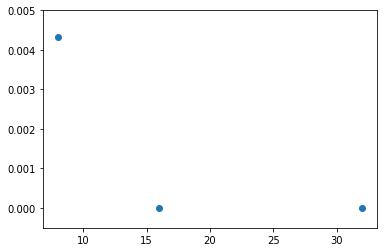

LinregressResult(slope=-20.02854320706271, intercept=37.461869565745374, rvalue=-0.9878934244574042, pvalue=0.09916191524400471, stderr=3.145187012582406)

In [36]:
n = [8,16,32]
error = []
for i in n:
    error.append(max((abs(diff_f(np.exp(np.sin(xj(i))))-np.cos(xj(i))*np.exp(np.sin(xj(i)))))))
    
plt.scatter(n,error)
plt.ylim(-0.0005,0.005)
plt.show()

linregress(np.log(n),np.log(error))